In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

### Make plots bigger

import seaborn as sns

In [7]:
sns.set(style='whitegrid', rc={'figure.figsize':(20.7,8.27)})

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter

import scipy.signal as sig
import pywt

clean_data = '/src/data/pdkit/GAIT_-_2018-06-14_13-50-58_-_d90b653403_-_13311.csv'

gd = GaitTimeSeries.load_data(clean_data, format_file='gait_gyro')

Sampling rate is 499.6666666666667 samples / second


In [2]:
gp = GaitProcessor(sampling_frequency=100.0, filter_order=4, cutoff_frequency=2.0)

d = gp.resample_signal(gd)

Sampling rate is 100.0 samples / second


In [3]:
df = gp.filter_data_frame(d)

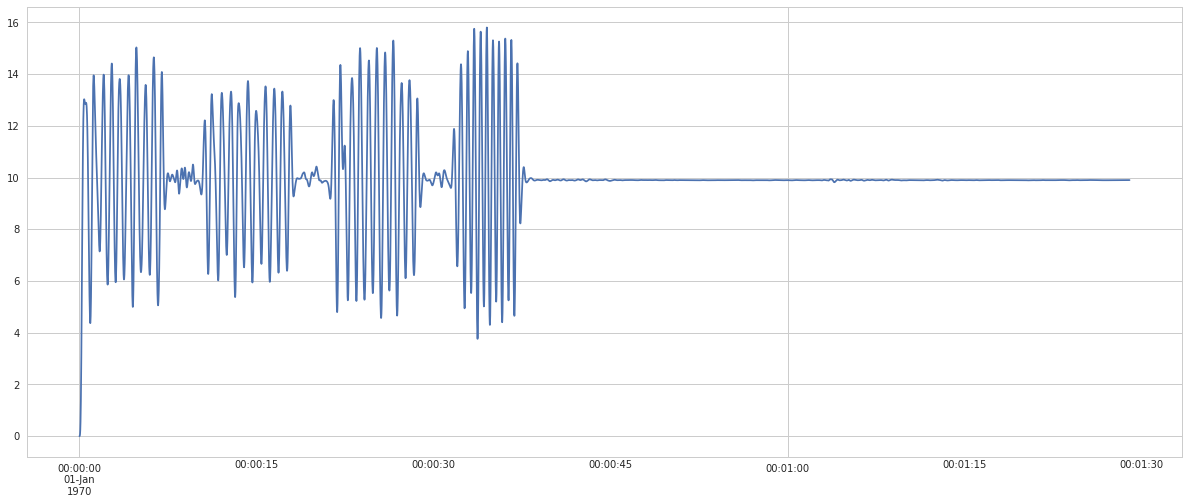

In [11]:
# let's work on magnitude data from now on...
dd = df.mag_sum_acc
dd.plot()

In [14]:
import sklearn.cluster as cluster

In [16]:
ms = cluster.MeanShift(bin_seeding=False)

In [21]:
clusters = ms.fit_predict(dd.values.reshape(-1, 1))

In [23]:
colors = [['red', 'green', 'blue', 'yellow'][i] for i in clusters]

IndexError: list index out of range

In [ ]:


two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)

ward = cluster.AgglomerativeClustering(
    n_clusters=n_clusters, linkage='ward',
    connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')